In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=23.6, repr.plot.height=9.1, repr.plot.res=300)

In [3]:
library(ggplot2)

pdf 
  2

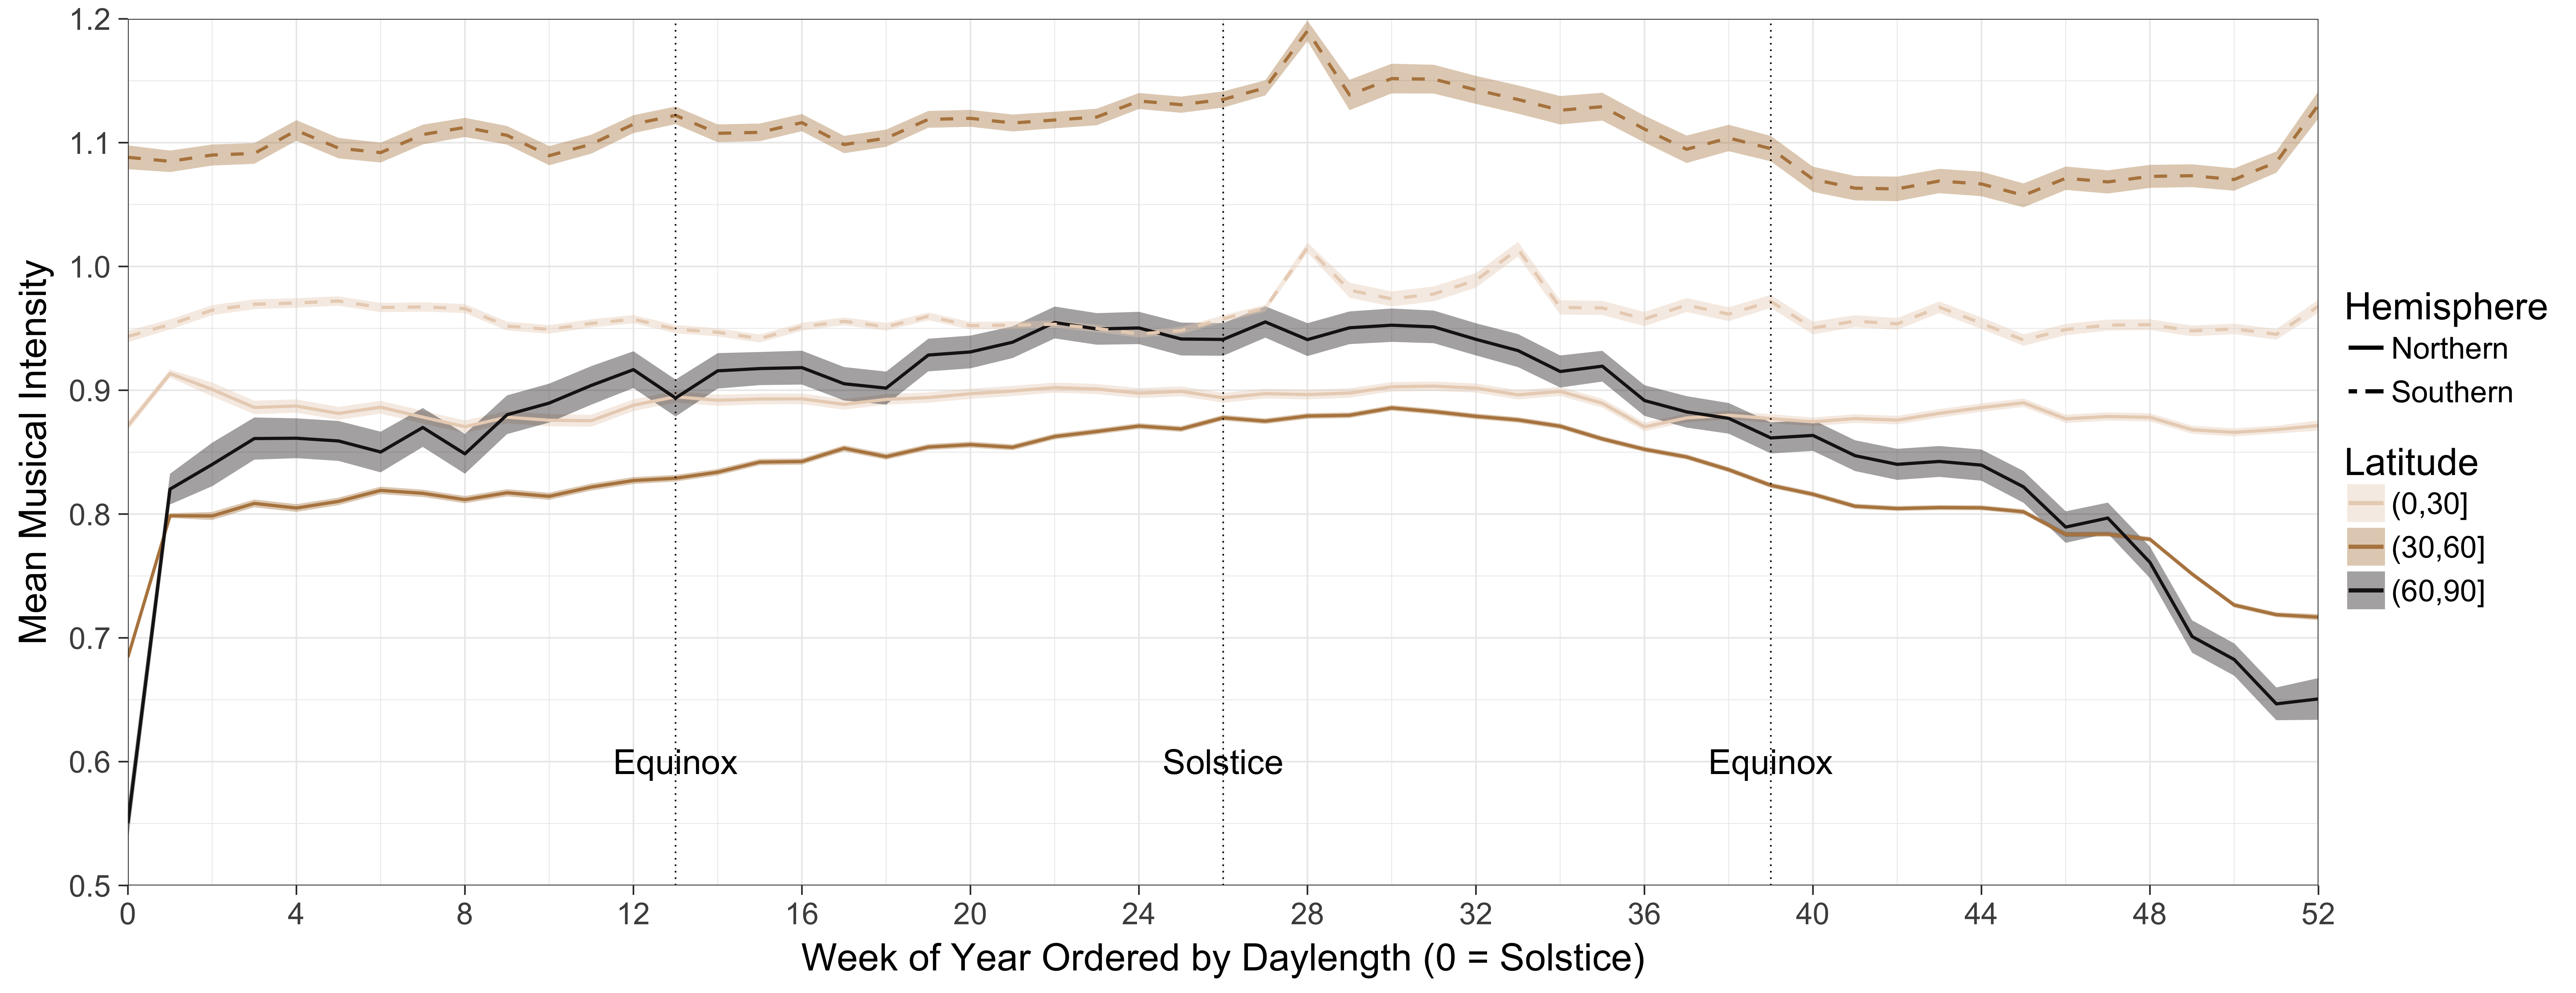

In [4]:
tmp <- read.csv("../data/intensity/woy_hemispherexdist.csv", header=TRUE)
my.cols <- c("#ead3bf","#b6854d","#1c1718")

p_hemispherexequator <- ggplot(tmp, aes(x=woy, y=within_variation, group=interaction(dist_code,Hemisphere))) + 
  geom_ribbon(aes(ymin=within_variation-ci, ymax=within_variation+ci, fill=dist_code), linetype=2, alpha=0.4) +
  scale_fill_manual(values=my.cols) +
  geom_line(aes(linetype=Hemisphere, color=dist_code), size=1, alpha=1) +
  scale_color_manual(values=my.cols) +
  scale_linetype_manual(values=c("solid", "dashed")) +
  geom_vline(xintercept=c(13,26,39), color="black", linetype="dotted") +
  annotate("text", x=13, y=0.6, label="Equinox", color="black", angle=0, size=8) +
  annotate("text", x=39, y=0.6, label="Equinox", color="black", angle=0, size=8) +
  annotate("text", x=26, y=0.6, label="Solstice", color="black", angle=0, size=8) +
  labs(x="Week of Year Ordered by Daylength (0 = Solstice)", y=paste("Mean Musical Intensity"), color="Latitude", fill="Latitude") +
  scale_y_continuous(limits=c(0.5,1.2), expand=c(0,0), breaks=seq(0.5,1.2,0.1),
                     labels=c(seq(0.5,0.9,0.1),"1.0",seq(1.1,1.2,0.1))) +
  scale_x_continuous(limits=c(0,52), expand=c(0,0), breaks=0:52*4,
                     labels=0:52*4) +
  theme_bw(base_size=25) +
  theme(legend.key.size=unit(2, "lines"),
        legend.background=element_rect(fill=alpha("white", 0))) +
  guides(color=guide_legend(override.aes=list(size=1.3)), linetype=guide_legend(override.aes=list(size=1.3, linetype=c("solid","twodash")), order=1))

p_hemispherexequator

pdf(file="../output/fig3.pdf", width=23.6, height=9.1)
print(p_hemispherexequator)
dev.off()
